In [19]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

## Random Walk Model

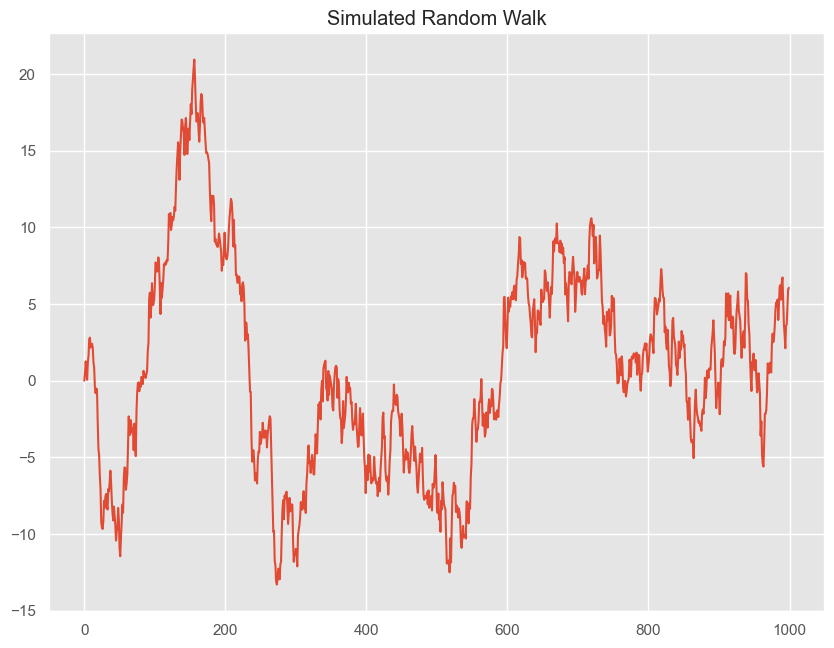

In [2]:
# Draw samples from a standard Normal distribution (mean=0, stdev=1).
points = np.random.standard_normal(1000)

# making starting point as 0
points[0]=0

# Return the cumulative sum of the elements along a given axis.
random_walk = np.cumsum(points)
random_walk_series = pd.Series(random_walk)

plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(random_walk)
plt.title("Simulated Random Walk")
plt.show()

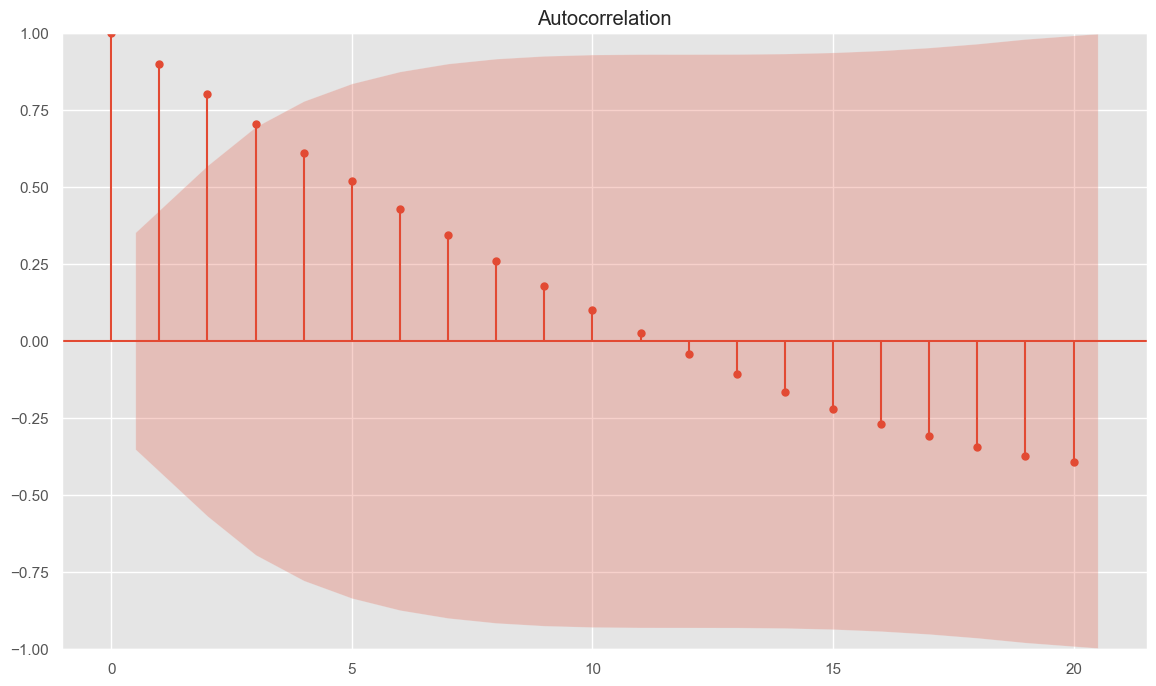

In [3]:
random_walk_acf = acf(random_walk)
acf_plot = plot_acf(random_walk_acf, lags=20)

Difference between 2 points:

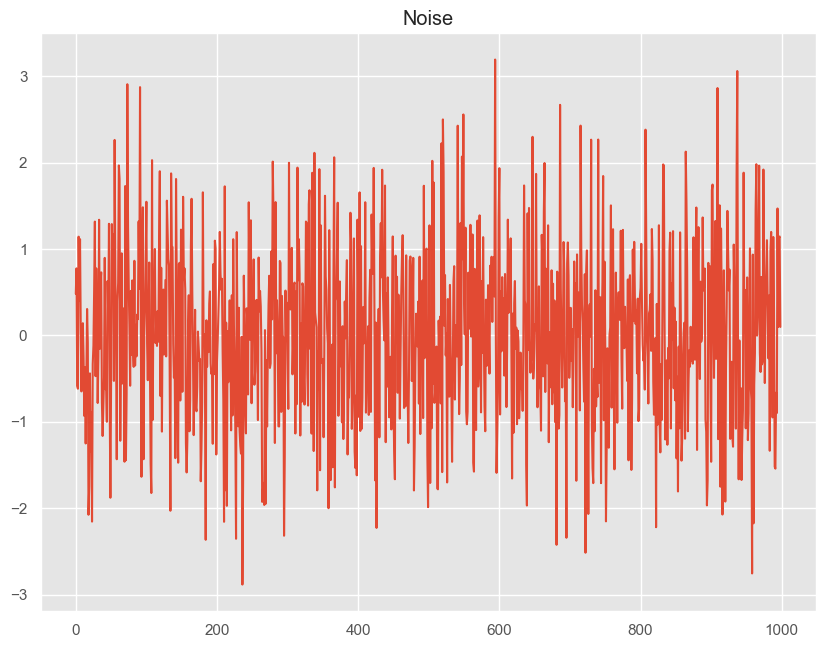

In [4]:
random_walk_difference = np.diff(random_walk, n=1)

plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(random_walk_difference)
plt.title('Noise')
plt.show()

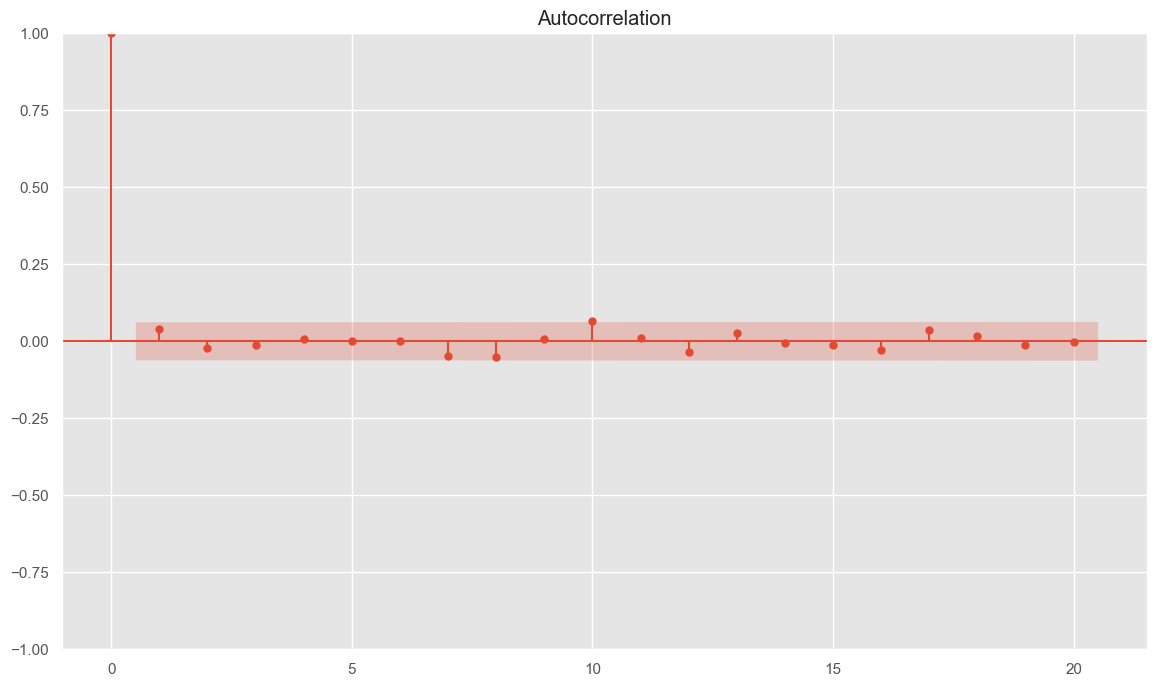

In [5]:
cof_plot_difference = plot_acf(random_walk_difference, lags=20);

## Moving Average Models (MA Models)
In MA models, we start with average mu, to get the value at time t, we add a linear combination of residuals from previous time stamps. In finance, residual refers to new unpredictable information that can't be captured by past data points. The residuals are difference between model's past prediction and actual values.

Moving average models are defined as MA(q) where q is the lag.

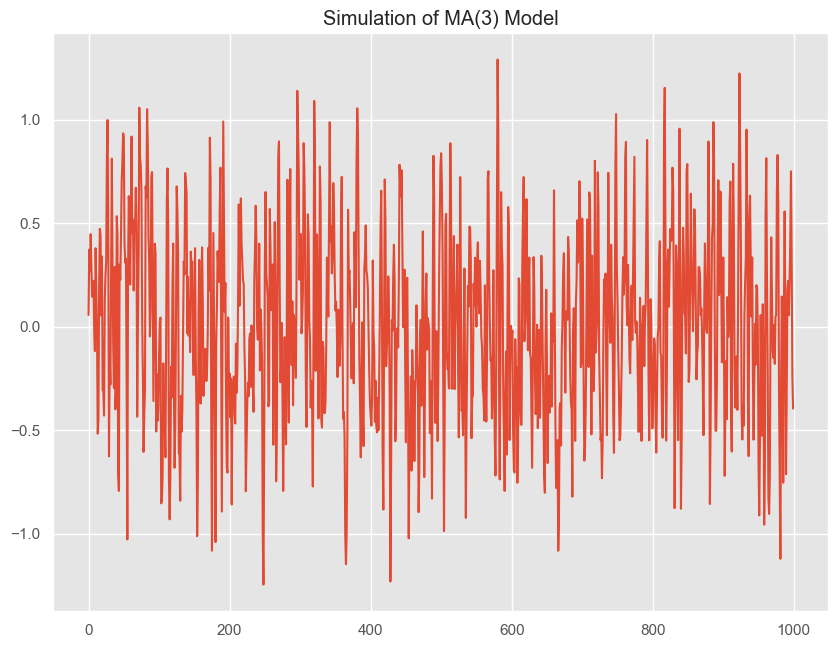

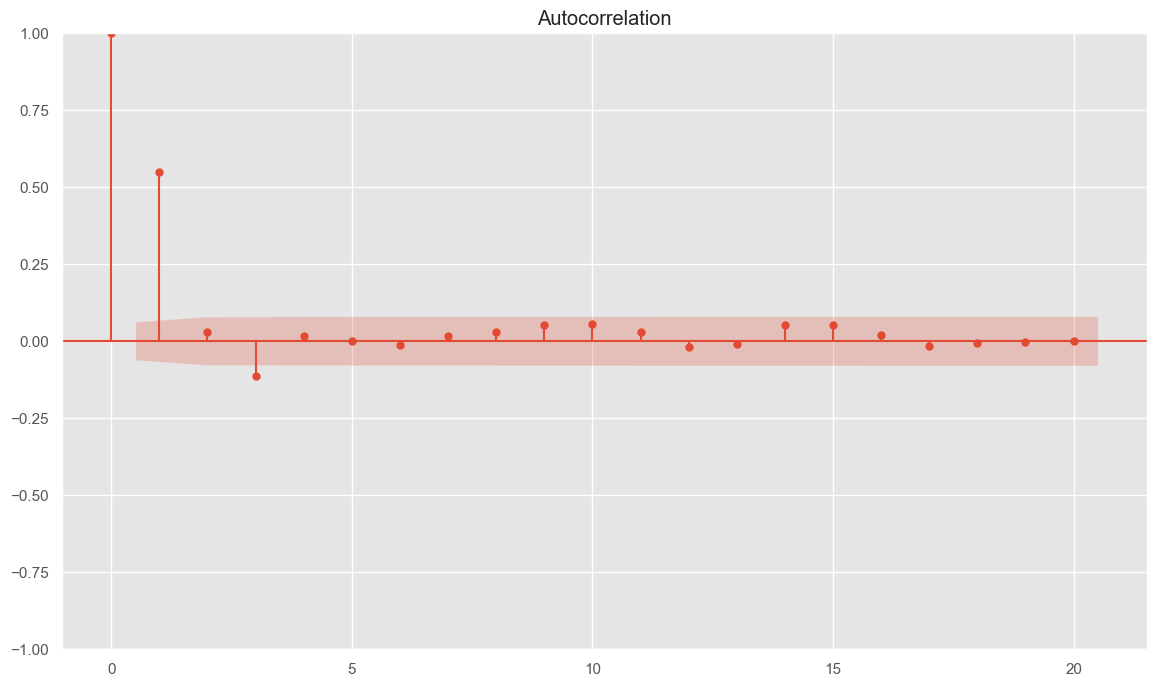

In [6]:
from statsmodels.tsa.arima_process import ArmaProcess

# start by specifying the lag
ar3 = np.array([3])

# specify the weights : [1, 0.9, 0.3, -0.2]
ma3 = np.array([1, 0.9, 0.3, -0.2])

# simulate the process and generate 1000 data points
MA_3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=1000)

plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(MA_3_process)
plt.title('Simulation of MA(3) Model')
plt.show()
plot_acf(MA_3_process, lags=20);

There is a significant correlation upto lag 3. Afterwards, the correlation is not significant anymore. This makes sense since we specified a formula with a lag of 3.

## AutoRegression Models (AR Models)
An auto-regressive models (AR Models) tries to fit in a line that is linear combination of previous values. It includes an intercept, that is indipendent of previous values. It also contains error term to represent movements that cannot be predicted by previous terms.

An AR model is defined by its lag. If an AR model uses only yesterday's value and ignores the rest, its called AR Lag 1, if the model uses two previous days values and ignores the rest, its called AR Lag 2 and so on.

Usually, autoregressive models are applied to stationary time series only. This constrains the range of the parameters phi. For example, an AR(1) model will constrain phi between -1 and 1. Those constraints become more complex as the order of the model increases, but they are automatically considered when modelling in Python. [1]

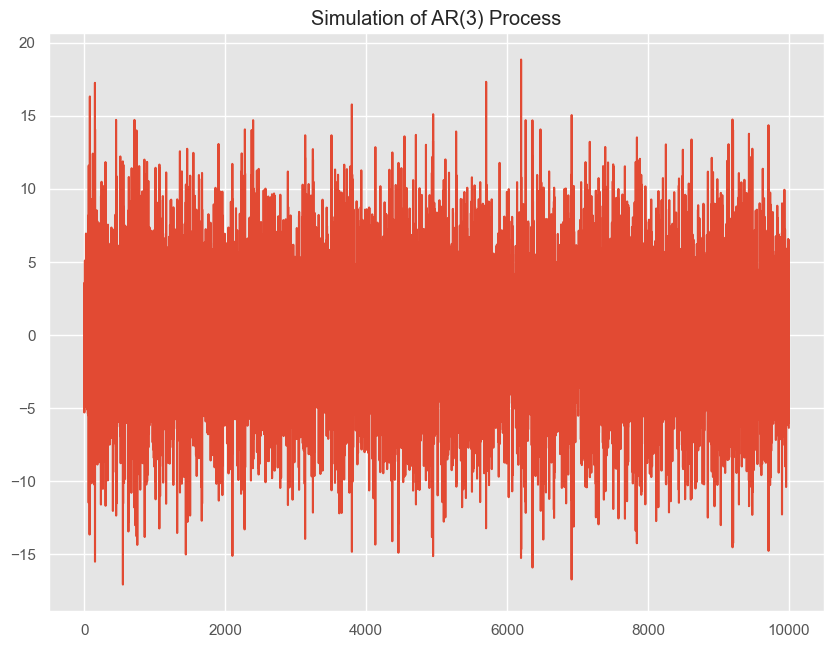

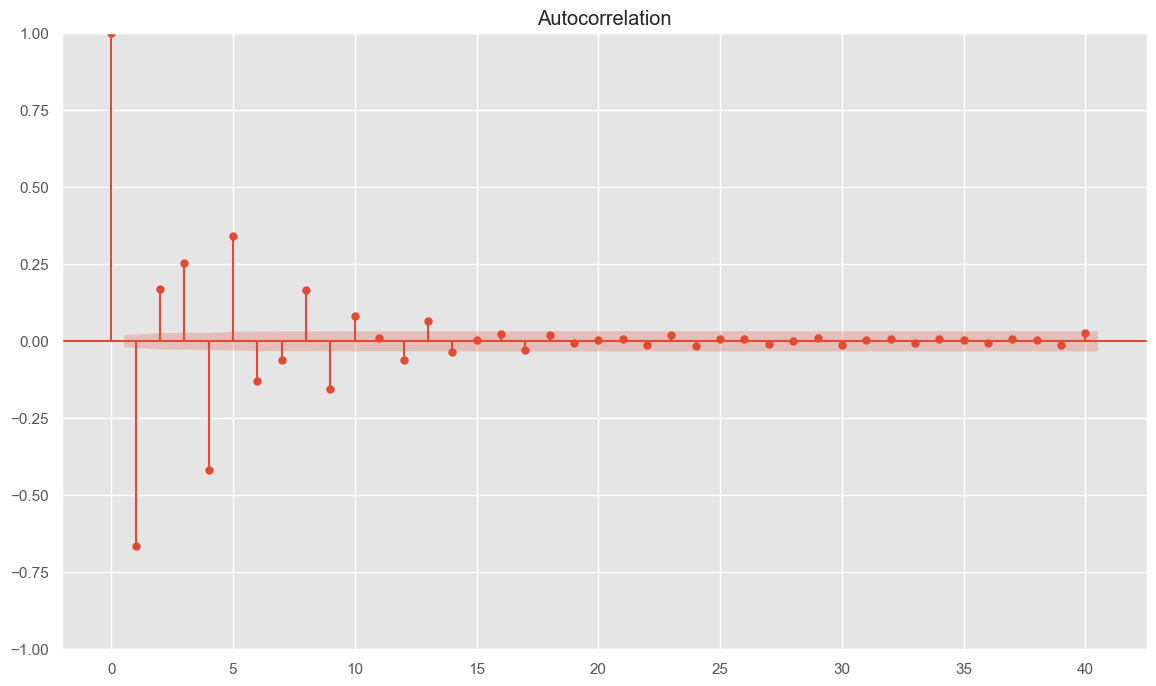

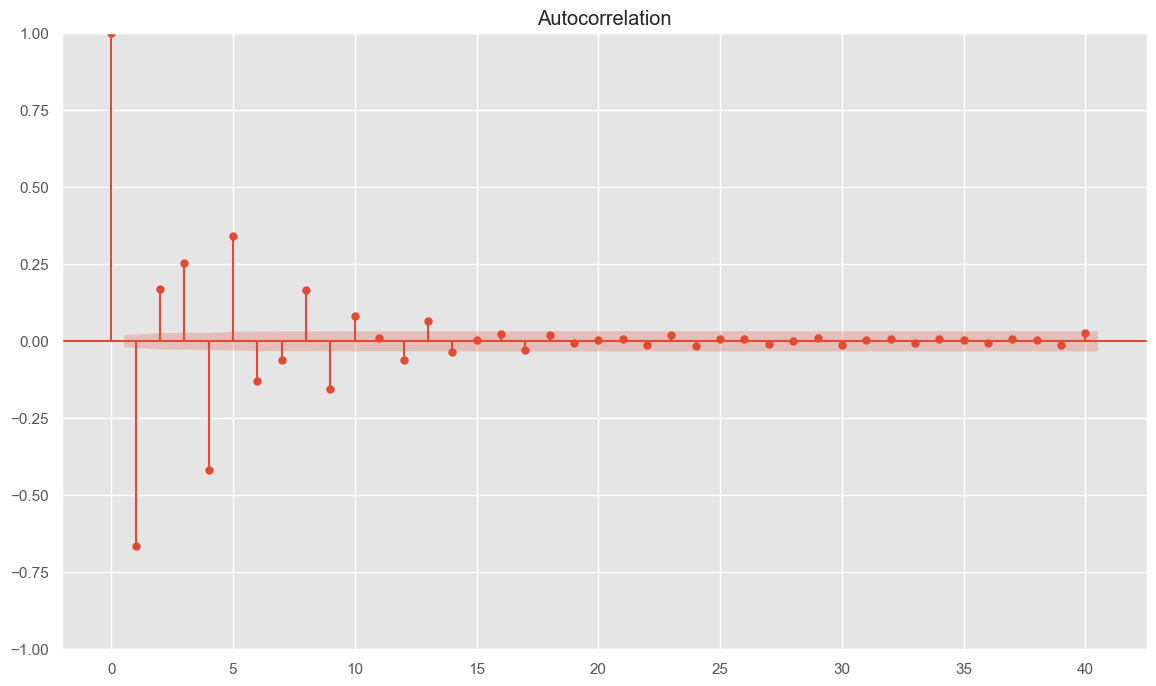

In [7]:
ar3 = np.array([1, 0.9, 0.3, -0.2])
ma = np.array([3])
simulated_ar3_points = ArmaProcess(ar3, ma).generate_sample(nsample=10000)

plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_ar3_points)
plt.title("Simulation of AR(3) Process")
plt.show()

plot_acf(simulated_ar3_points)

### Partial Autocorrelation Plot
The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove.

c:\Users\李岳\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


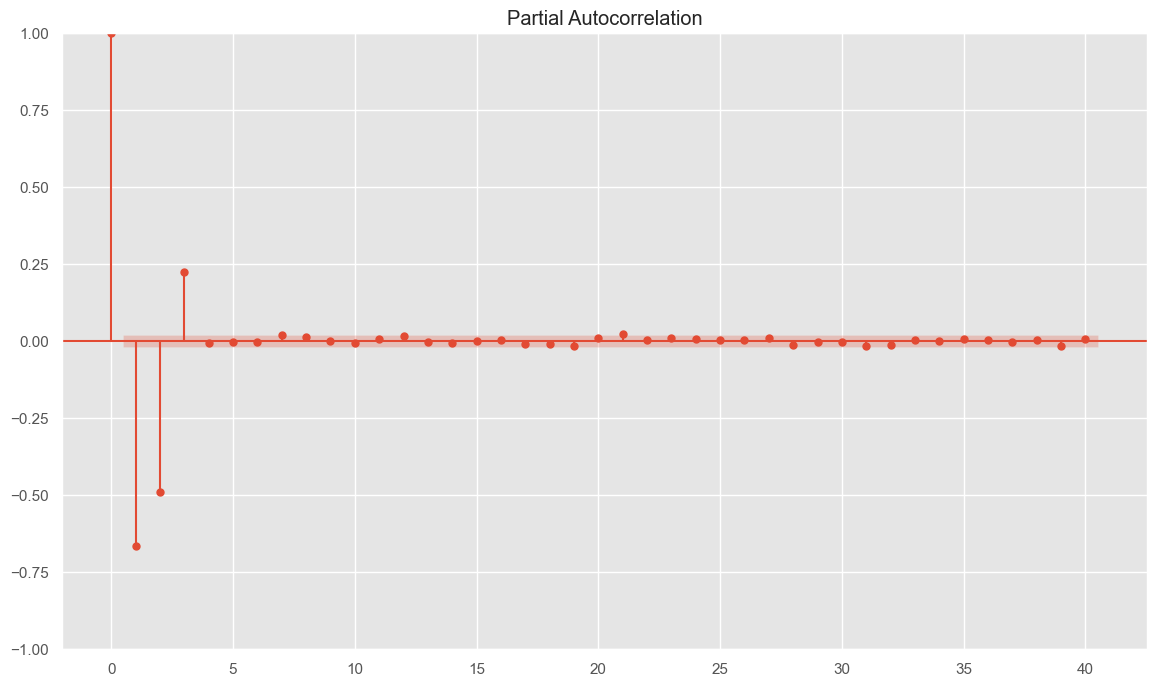

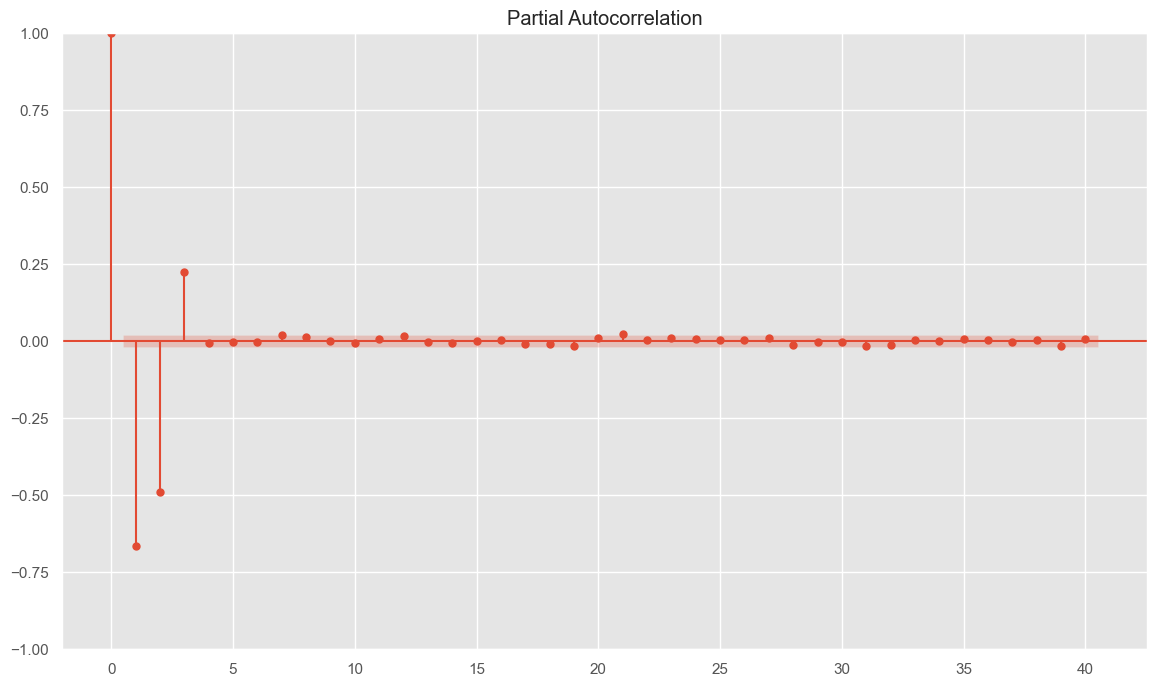

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(simulated_ar3_points)

As you can see the coefficients are not significant after lag 3. Therefore, the partial autocorrelation plot is useful to determine the order of an AR(p) process. 

In [9]:
from statsmodels.tsa.stattools import pacf

pacf_coef_AR3 = pacf(simulated_ar3_points)
print(pacf_coef_AR3)

[ 1.00000000e+00 -6.64693073e-01 -4.90496761e-01  2.22610328e-01
 -7.69016618e-03 -5.37000268e-03 -3.49066044e-03  1.89381096e-02
  1.09729915e-02 -3.70386775e-04 -7.66269536e-03  6.58557327e-03
  1.65962514e-02 -2.90192665e-03 -6.67278129e-03 -1.61532221e-04
  1.59213792e-03 -9.65442660e-03 -1.19238007e-02 -1.57085967e-02
  7.97246340e-03  2.13178359e-02  2.16291134e-03  9.05912446e-03
  4.27523352e-03  2.33412809e-03  1.88318454e-03  1.06649723e-02
 -1.47541329e-02 -4.34781373e-03 -4.41801866e-03 -1.64481700e-02
 -1.28586091e-02  3.75984556e-03  3.95066794e-04  4.80373686e-03
  2.39498105e-03 -4.26073003e-03  2.64645219e-03 -1.83289896e-02
  7.33933816e-03]


## Autoregressive Moving Average Models (ARMA Models)
The ARMA model is defined with a p and q. p is the lag for autoregression and q is lag for moving average. Regression based training models require data to be stationary. For a non-stationary dataset, the mean, variance and co-variance may change over time. This causes difficulty in predicting future based on past.

### ARMA(1,1) Process

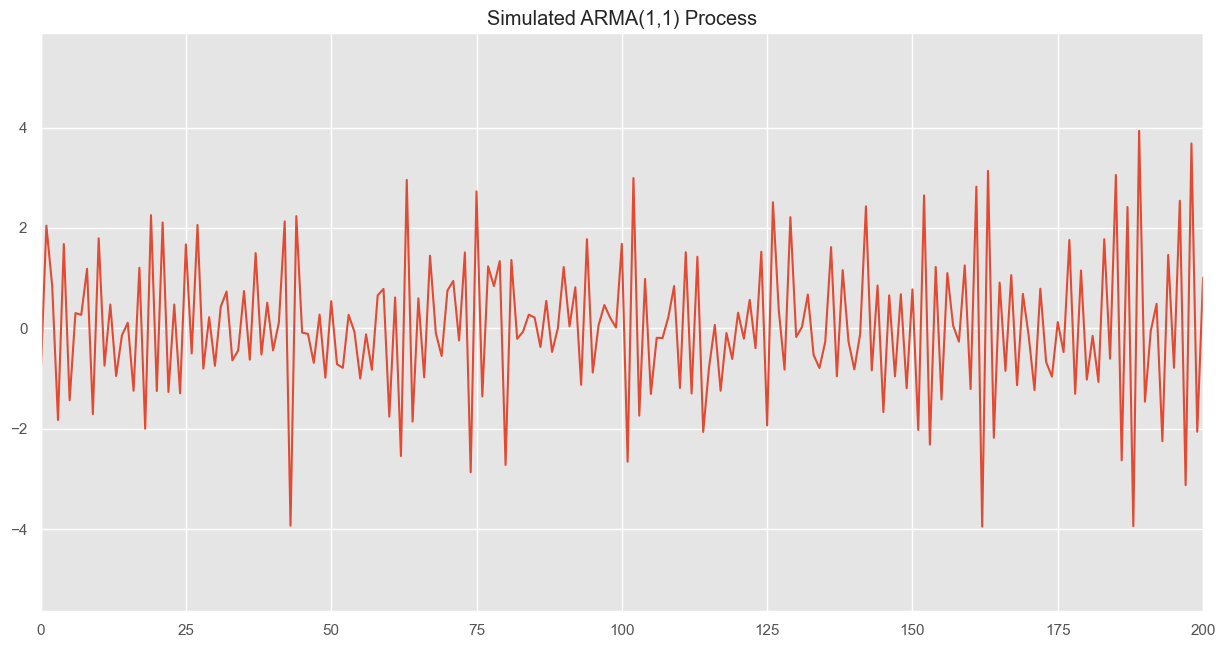

In [10]:
ar1 = np.array([1, 0.6])
ma1 = np.array([1, -0.2])
simulated_ARMA_1_1_points = ArmaProcess(ar1, ma1).generate_sample(nsample=10000)

plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(simulated_ARMA_1_1_points)
plt.title("Simulated ARMA(1,1) Process")
plt.xlim([0, 200])
plt.show()

c:\Users\李岳\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


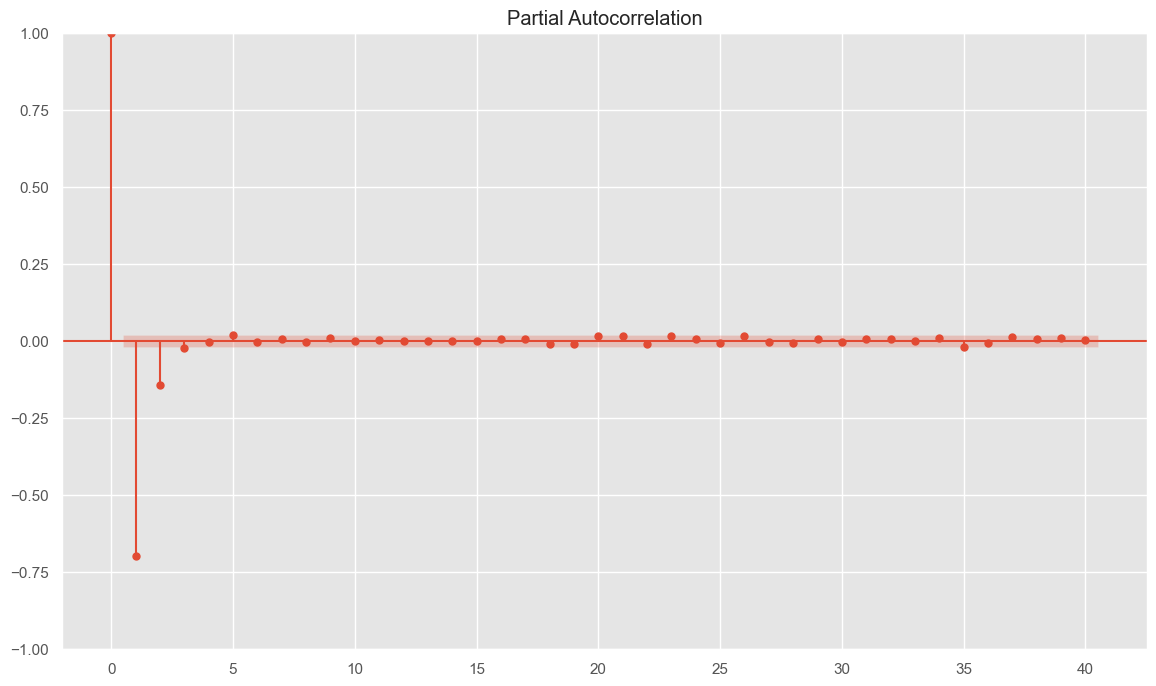

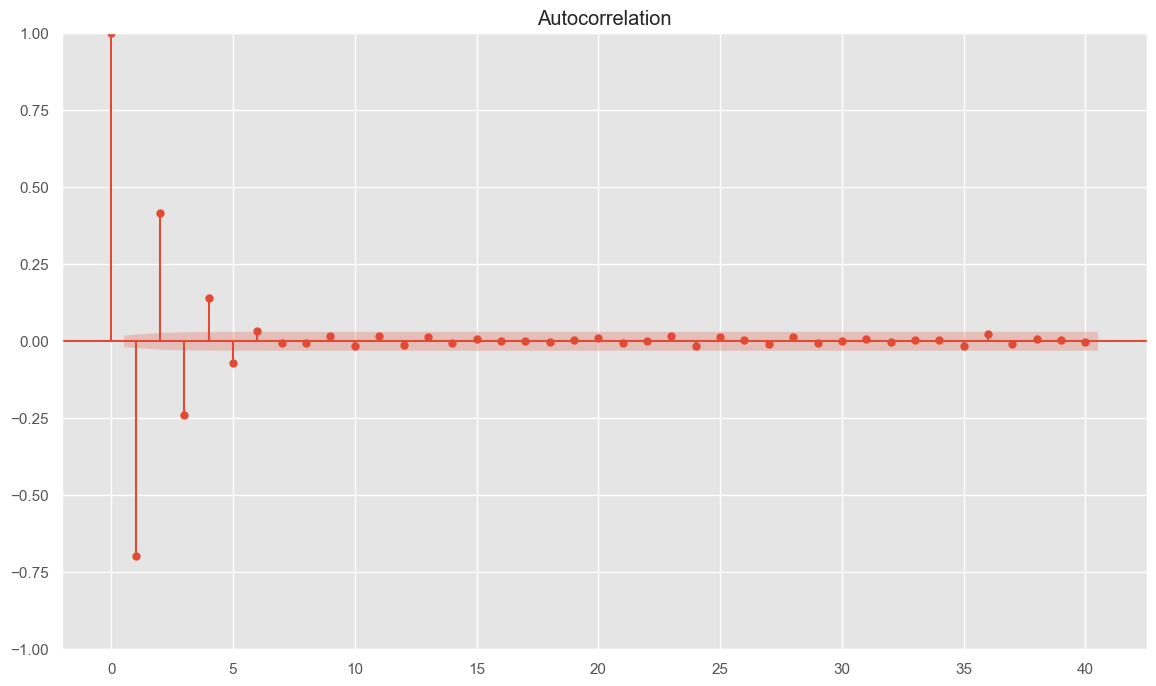

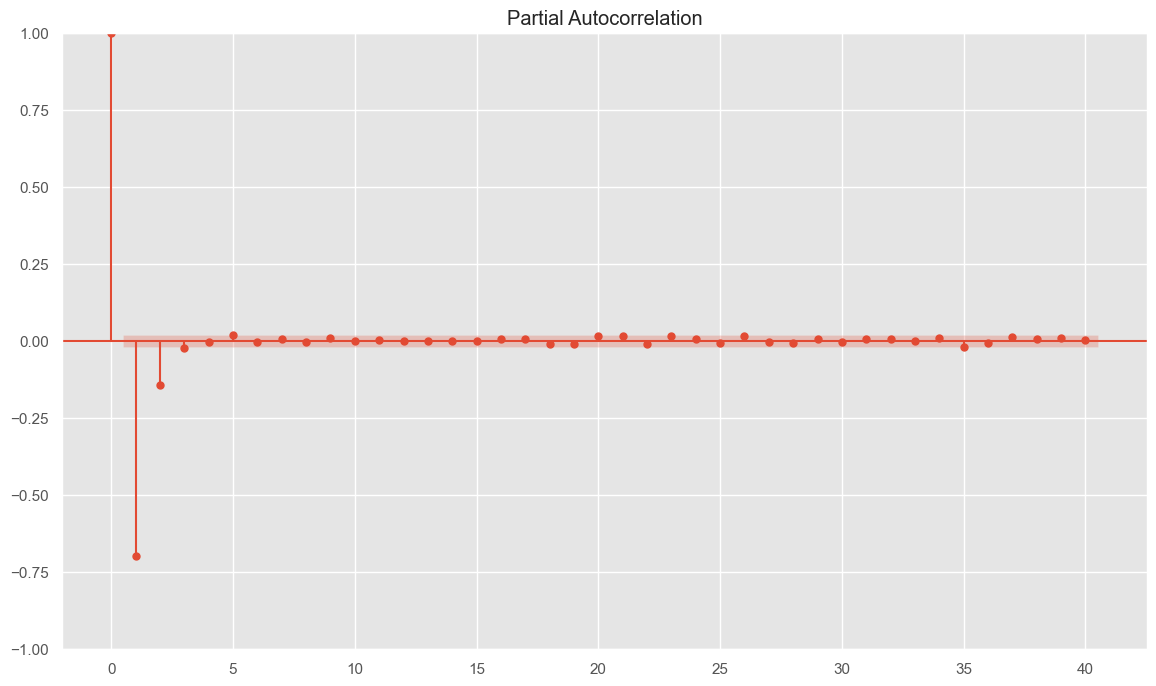

In [11]:
plot_acf(simulated_ARMA_1_1_points)
plot_pacf(simulated_ARMA_1_1_points)

As you can see, we cannot infer the order of the ARMA process by looking at these plots. In fact, looking closely, we can see some sinusoidal shape in both ACF and PACF functions.

### ARMA(2, 2) Process

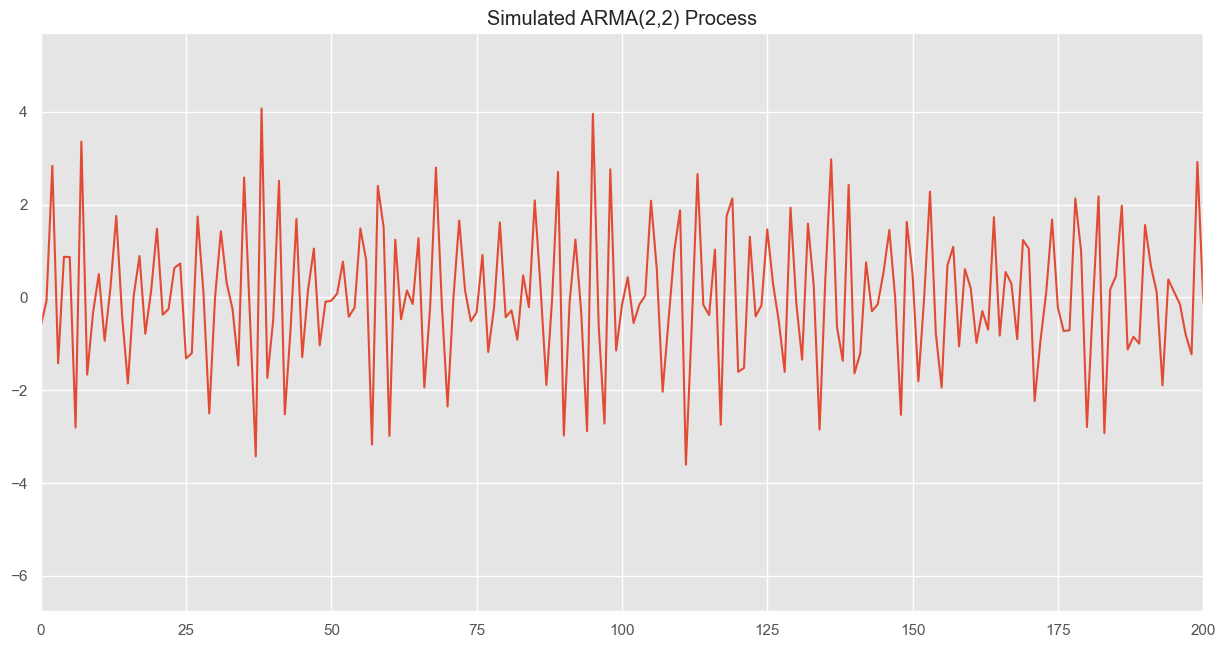

In [12]:
ar2 = np.array([1, 0.6, 0.4])
ma2 = np.array([1, -0.2, -0.5])

simulated_ARMA_2_2_points = ArmaProcess(ar2, ma2).generate_sample(nsample=10000)

plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(simulated_ARMA_2_2_points)
plt.title("Simulated ARMA(2,2) Process")
plt.xlim([0, 200])
plt.show()

c:\Users\李岳\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


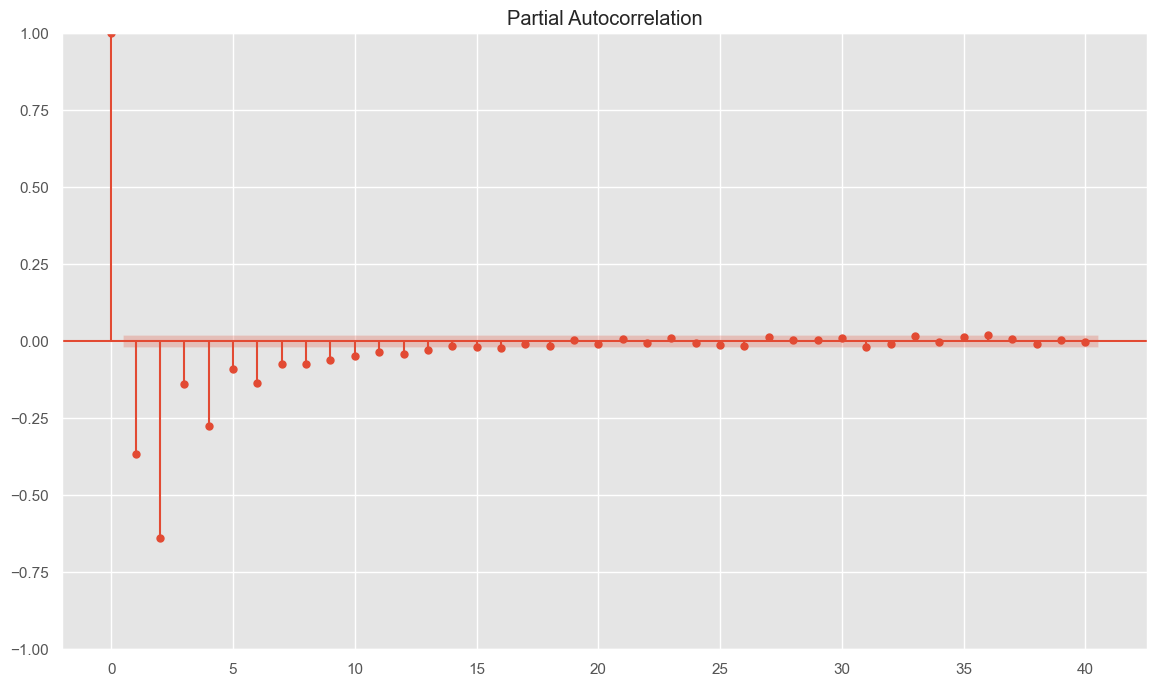

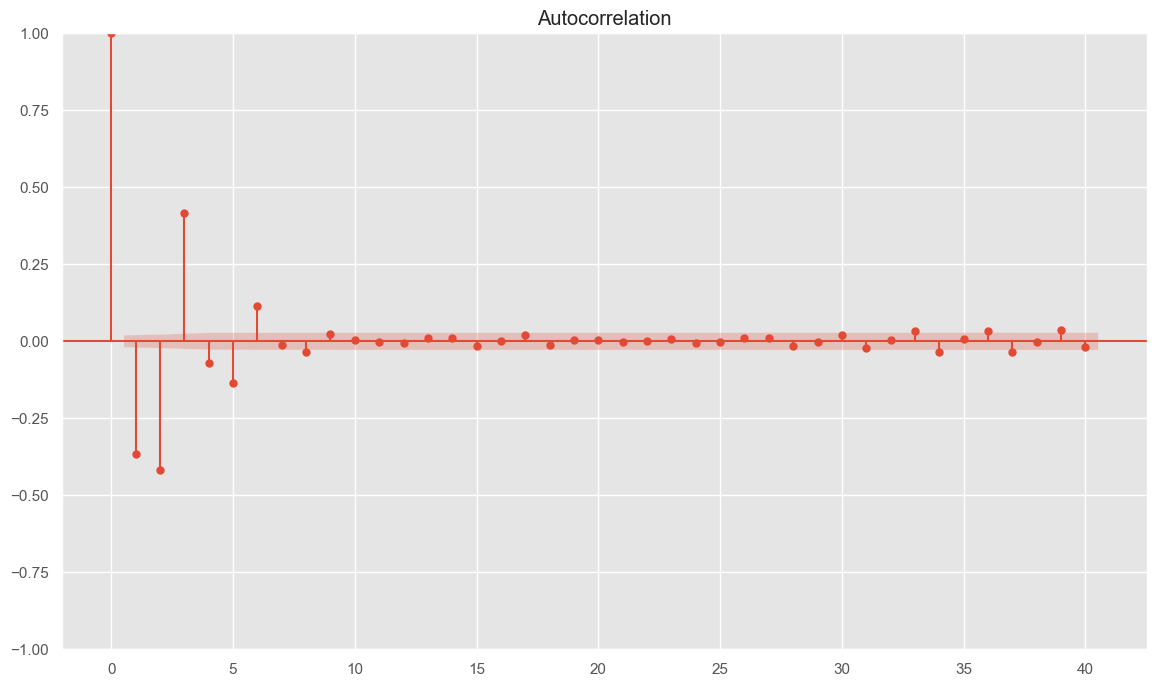

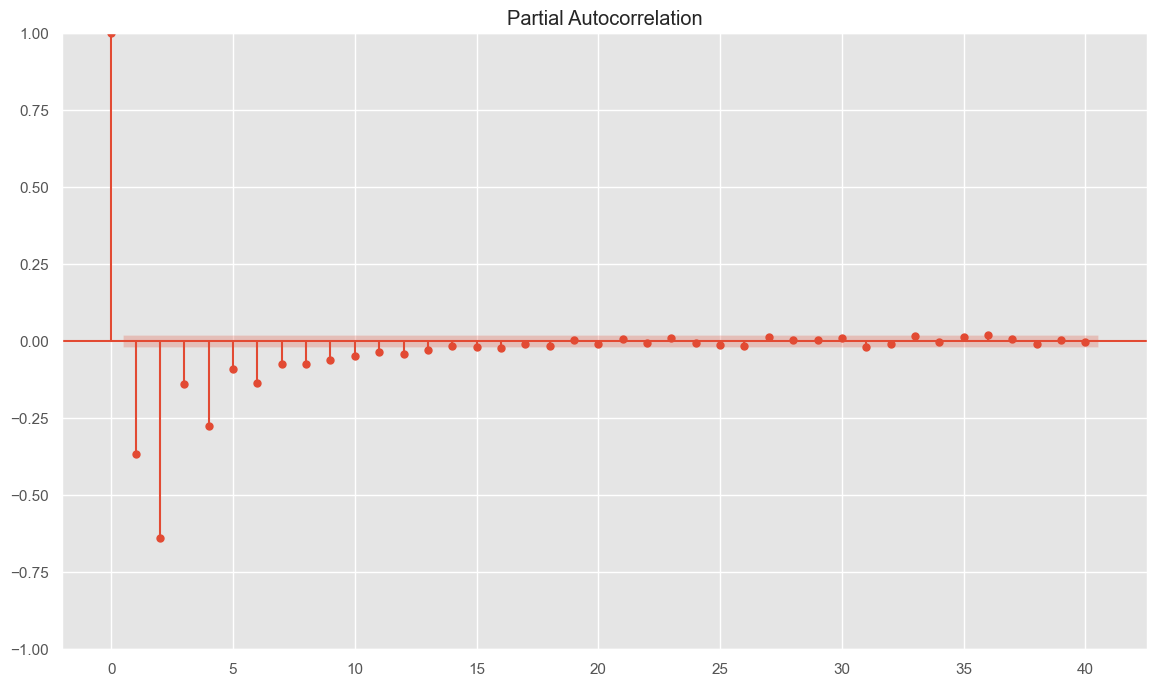

In [13]:
plot_acf(simulated_ARMA_2_2_points)
plot_pacf(simulated_ARMA_2_2_points)

As you can see, both plots exhibit the same sinusoidal trend, which further supports the fact that both an AR(p) process and a MA(q) process is in play.

## Autoregressive Integrated Moving Average Models (ARIMA Models)

This model is the combination of autoregression, a moving average model and differencing. In this context, integration is the opposite of differentiation.

Differentiation is useful to remove the trend in a time series and make it stationary.
It simply involves subtracting a point a t-1 from time t.

Mathematically, the ARIMA(p,d,q) now requires three parameters:

p: the order of the autoregressive process
d: the degree of differentiation (number of times it was differenced)
q: the order of the moving average process

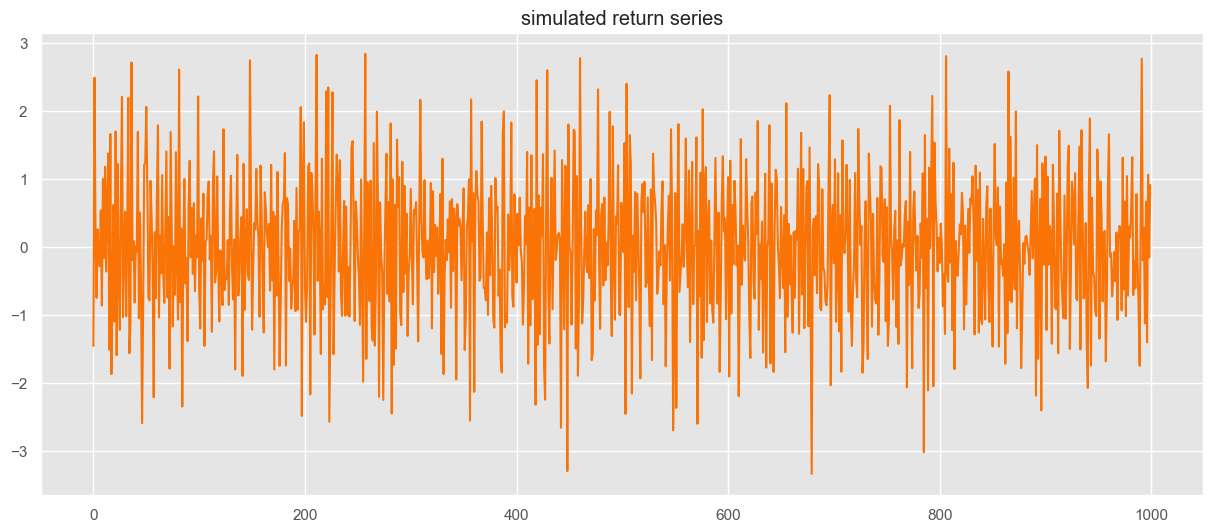

In [14]:
np.random.seed(200)

ar_params = np.array([1, -0.4])
ma_params = np.array([1, -0.8])

returns = ArmaProcess(ar_params, ma_params).generate_sample(nsample=1000)

returns = pd.Series(returns)
drift = 100

price = pd.Series(np.cumsum(returns)) + drift

returns.plot(figsize=(15,6), color=sns.xkcd_rgb["orange"], title="simulated return series")
plt.show()

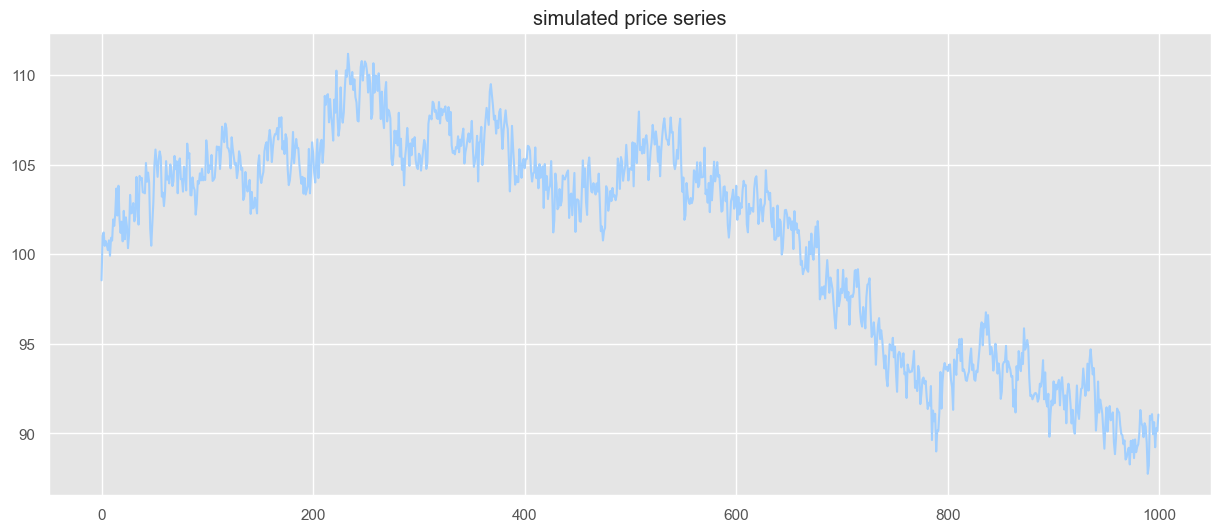

In [15]:
price.plot(figsize=(15,6), color=sns.xkcd_rgb["baby blue"], title="simulated price series")
plt.show()

### Extract stationary data
One way to get stationary time-series is by taking difference between points in time-series. This time difference is called rate of change.

`rate_of_change = current_price / previous_price`

The corresponding log return will become :

`log_returns = log(current_price) - log(previous_price)`

c:\Users\李岳\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


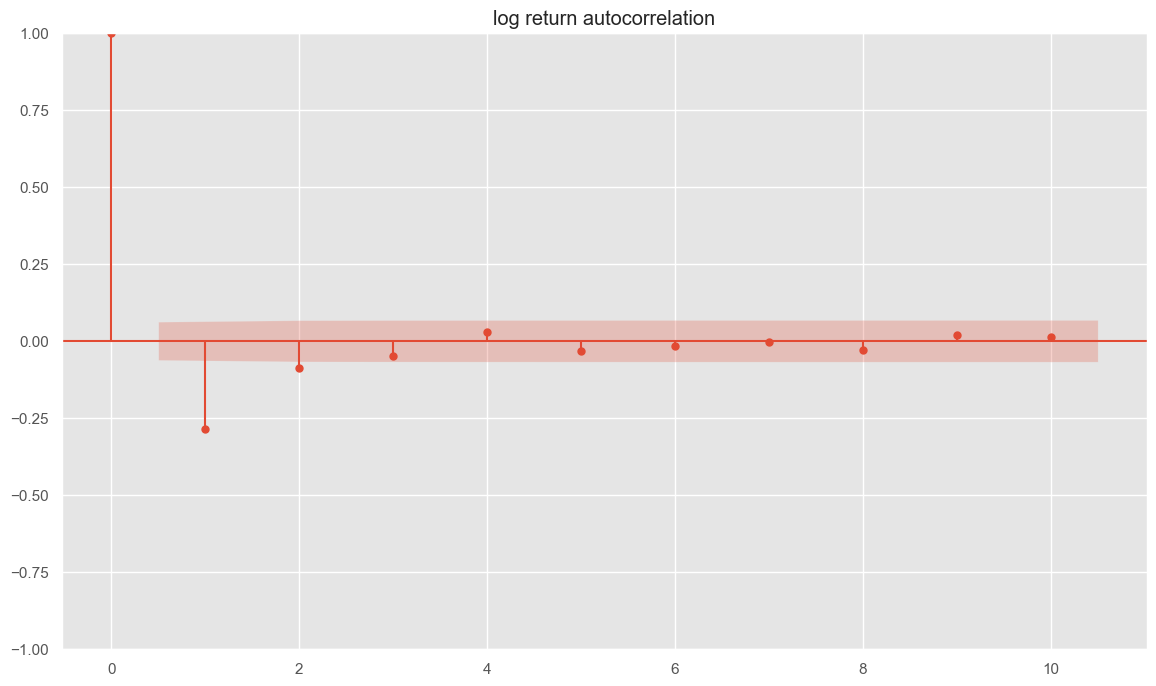

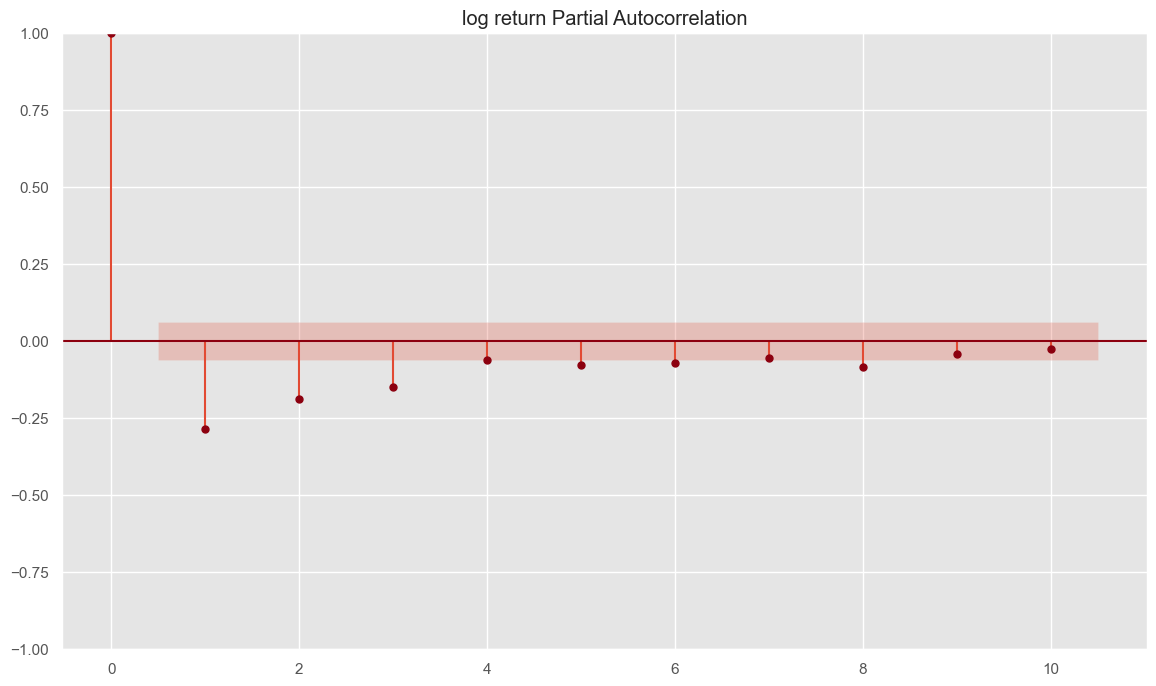

In [16]:
log_return = np.log(price) - np.log(price.shift(1))
log_return = log_return[1:]


_ = plot_acf(log_return,lags=10, title='log return autocorrelation')

_ = plot_pacf(log_return, lags=10, title='log return Partial Autocorrelation', color=sns.xkcd_rgb["crimson"])

c:\Users\李岳\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


fitted AR parameter 0.38, MA parameter -0.78


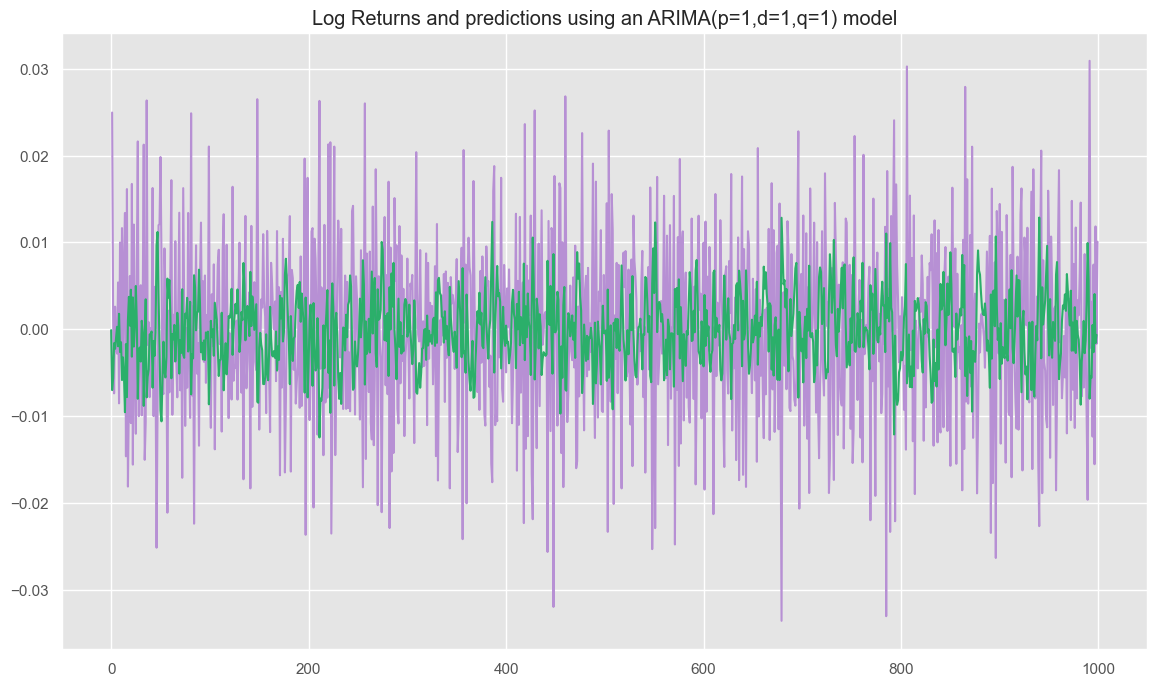

In [20]:
def fit_arima(log_returns):
        ar_lag_p = 1
        ma_lag_q = 1
        degree_of_differentiation_d = 0

        # create tuple : (p, d, q)
        order = (ar_lag_p, degree_of_differentiation_d, ma_lag_q)

        # create an ARIMA model object, passing in the values of the lret pandas series,
        # and the tuple containing the (p,d,q) order arguments
        arima_model = ARIMA(log_returns.values, order=order)
        arima_result = arima_model.fit()

        #TODO: from the result of calling ARIMA.fit(),
        # save and return the fitted values, autoregression parameters, and moving average parameters
        fittedvalues = arima_result.fittedvalues
        arparams = arima_result.arparams
        maparams = arima_result.maparams

        return fittedvalues, arparams, maparams


fittedvalues, arparams, maparams = fit_arima(log_return)
arima_pred = pd.Series(fittedvalues)
plt.plot(log_return, color=sns.xkcd_rgb["pale purple"])
plt.plot(arima_pred, color=sns.xkcd_rgb["jade green"])
plt.title('Log Returns and predictions using an ARIMA(p=1,d=1,q=1) model');
print(f"fitted AR parameter {arparams[0]:.2f}, MA parameter {maparams[0]:.2f}")